# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Generamos un dataset no-linealmente separable y vemos cómo responde el Perceptrón.
2. **MNIST**: vamos a trabajar con este conocido dataset. El objetivo es identificar dígitos, del 0 al 9, escritos a manos. Primero entrenaremos una red neuronal de una capa y luego una Red Neuronal de más capas.

## 1. Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [31]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=0)

# X, y = make_moons(n_samples=1000, random_state=0)

# X, y = make_circles(n_samples=1000, random_state=0)

In [32]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


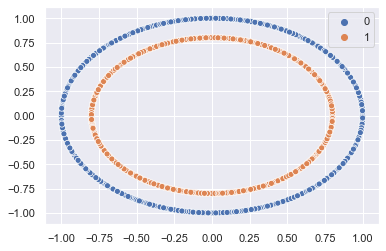

In [33]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [34]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

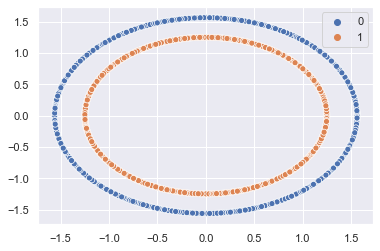

In [35]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar y volvemos a mirar algunas de sus características.

In [52]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(X, y, epochs=1000, validation_split=0.25)

Train on 750 samples, validate on 250 samples
Epoch 1/1000
750/750 [==============================] - 1s 959us/step - loss: 0.7737 - acc: 0.4893 - val_loss: 0.7482 - val_acc: 0.5440
Epoch 2/1000
750/750 [==============================] - 0s 67us/step - loss: 0.7579 - acc: 0.4867 - val_loss: 0.7379 - val_acc: 0.5320
Epoch 3/1000
750/750 [==============================] - 0s 72us/step - loss: 0.7469 - acc: 0.4867 - val_loss: 0.7305 - val_acc: 0.5280
Epoch 4/1000
750/750 [==============================] - 0s 80us/step - loss: 0.7386 - acc: 0.4853 - val_loss: 0.7241 - val_acc: 0.5240
Epoch 5/1000
750/750 [==============================] - 0s 70us/step - loss: 0.7321 - acc: 0.4867 - val_loss: 0.7195 - val_acc: 0.5160
Epoch 6/1000
750/750 [==============================] - 0s 82us/step - loss: 0.7270 - acc: 0.4800 - val_loss: 0.7160 - val_acc: 0.5200
Epoch 7/1000
750/750 [==============================] - 0s 61us/step - loss: 0.7232 - acc: 0.4800 - val_loss: 0.7132 - val_acc: 0.5120
Epoch 8/

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [57]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

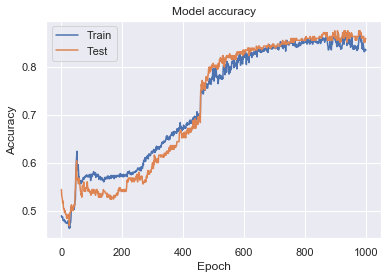

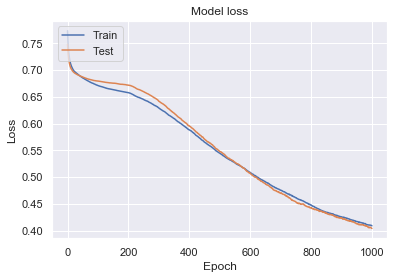

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [59]:
print(model.get_weights())

[array([[ 0.00550828,  2.4737859 ,  0.7961013 , -0.76008105],
       [-0.02289553, -0.7053148 , -1.5988098 , -2.5690594 ]],
      dtype=float32), array([-0.03799984, -0.8279895 ,  2.619935  , -0.47675216], dtype=float32), array([[ 0.54493773],
       [-4.1335597 ],
       [ 3.0585713 ],
       [-3.6741714 ]], dtype=float32), array([-1.2780067], dtype=float32)]


Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

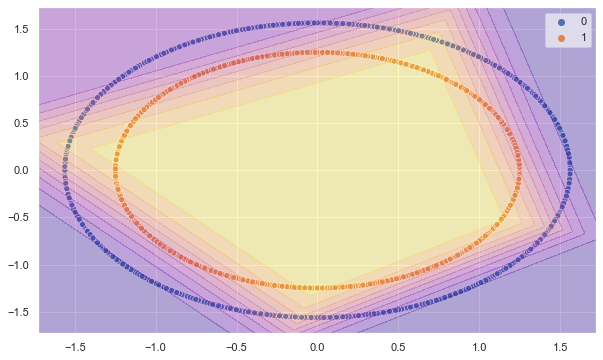

In [60]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?¿Y si hacen lo mismo para `make_circles?`

**Ejercicio**: con los datos producidos por `make_moons`, agregar una capa a la red neuronal, con 10 neuronas y función de activación `relu`.

**Ejercicio**: repetir el ejercicio anterior, pero para los datos producidos por `make_circles`.

## 2. MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo 
import random

from sklearn.model_selection import train_test_split

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [ ]:
directorio = 'Datasets/MNIST/'

Miramos las carpetas que hay adentro de la carpeta MNIST

In [ ]:
print(os.listdir(directorio))

Creamos los contenedores vacíos

In [ ]:
todas_imagenes = []
y_todas_imagenes = []

y los llenamos.

In [ ]:
digitos = np.arange(0,10)
for digito in digitos:
    directorio = 'Datasets/MNIST/' + str(digito) + '/'
    print(digito, directorio)
    print('Hay', len(os.listdir(directorio)),'imagenes')
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen))
        y_todas_imagenes.append(digito)
        
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [ ]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[COMPLETAR]
ancho_imagen = todas_imagenes.shape[COMPLETAR]
largo_imagen = todas_imagenes.shape[COMPLETAR]

Miramos una imagen al azar.

In [ ]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [ ]:
X = todas_imagenes.reshape(COMPLETAR, COMPLETAR*COMPLETAR)
print(X.shape)

**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [ ]:
X = X/COMPLETAR

**Ejercicio:** usar el `to_categorical` de Keras para llevar `y_todas_imagenes` a una columna con unos y ceros para cada clase `y` (One Hot Encoding).

In [ ]:
from keras.utils import to_categorical
y = to_categorical(COMPLETAR)
print(y.shape)

**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test. Fijar el random state en 42.

In [ ]:
X_train, X_test, y_train, y_test = COMPLETAR

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras

model = COMPLETAR
model.add(COMPLETAR)

optimizador = keras.optimizers.Adam(COMPLETAR)

model.compile(optimizer=COMLPETAR,loss=COMPLETAR,
              metrics=['accuracy'])

history = model.fit(COMPLETAR, COMPLETAR, COMPLETAR, validation_split=0.1)


**Ejercicio:** ¿cuántos parámetros tiene el modelo? Recordar que hay una función de Keras que hace un *informe* de la red neuronal.

In [ ]:
model.COMPLETAR()

**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

https://keras.io/visualization/

In [ ]:
COMPLETAR

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [ ]:
y_test_pred = model.COMPLETAR(COMPLETAR)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [ ]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

**Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

COMPLETAR(COMPLETAR, COMPLETAR)

In [ ]:
from sklearn.metrics import accuracy_score

COMPLETAR

**Ejercicio:** ¿Dónde se está confundiendo? Graficar algunos ejemplos.

In [ ]:
errores = COMPLETAR != COMPLETAR

In [ ]:
imagenes_errores = X_test[COMPLETAR,:]
y_test_errores = y_test[COMPLETAR]
y_test_pred_errores = y_test_pred[COMPLETAR]
print(imagenes_errores.shape)

In [ ]:
imagenes_errores = imagenes_errores.reshape(imagenes_errores.shape[0], ancho_imagen, largo_imagen)
print(imagenes_errores.shape)

In [ ]:
idx_imagen = np.random.randint(0,imagenes_errores.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_test_errores[idx_imagen]) +'. Fue etiquetado como ' + str(y_test_pred_errores[idx_imagen]))
plt.imshow(imagenes_errores[idx_imagen, :, :])
plt.show()

**Ejercicio:** Volver a entrenar, pero agregando una capa con 800 neuronas y función de activación `relu`.